In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set a random seed for consistent results
RANDOM_STATE = 42

In [3]:
print("=" * 50)
print("K-NN CLASSIFIER - SUPER SIMPLE FOR BEGINNERS")
print("=" * 50)

K-NN CLASSIFIER - SUPER SIMPLE FOR BEGINNERS


In [4]:

# Step 1: Load Data
# What: Load the Wine dataset
# Why: We need data to predict wine classes (0, 1, or 2)
# How: Use sklearn's load_wine dataset
print("\n1. LOADING DATA")
print("-" * 20)


1. LOADING DATA
--------------------


In [5]:
wine_data = load_wine()
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.Series(wine_data.target, name='Class')

In [6]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Class, Length: 178, dtype: int32

In [8]:
print(f"Dataset has {X.shape[0]} wines and {X.shape[1]} features")
print(f"Classes: {wine_data.target_names}")
print(f"Features: {list(X.columns)}")


Dataset has 178 wines and 13 features
Classes: ['class_0' 'class_1' 'class_2']
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [9]:
print("Checking for missing values:")
print(X.isnull().sum().sum(), "missing values found")
print("All features are numbers - ready to go!")

Checking for missing values:
0 missing values found
All features are numbers - ready to go!


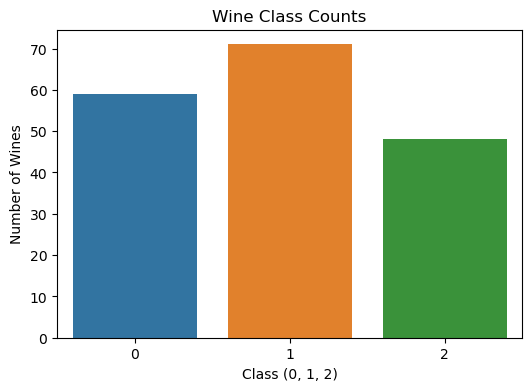

Saved class counts as 'class_distribution.png'


In [10]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Wine Class Counts')
plt.xlabel('Class (0, 1, 2)')
plt.ylabel('Number of Wines')
plt.savefig('class_distribution.png')
plt.show()
print("Saved class counts as 'class_distribution.png'")

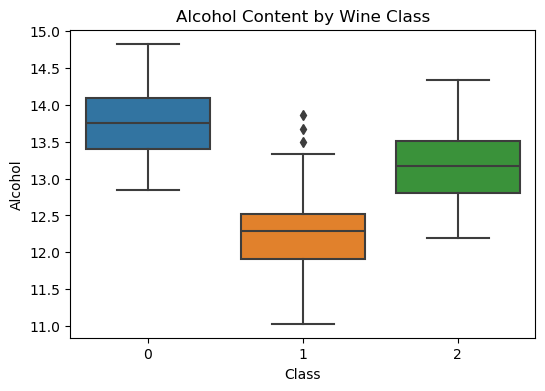

Saved alcohol plot as 'alcohol_by_class.png'


In [11]:
# Plot alcohol vs class
plt.figure(figsize=(6, 4))
sns.boxplot(x=y, y=X['alcohol'])
plt.title('Alcohol Content by Wine Class')
plt.xlabel('Class')
plt.ylabel('Alcohol')
plt.savefig('alcohol_by_class.png')
plt.show()
print("Saved alcohol plot as 'alcohol_by_class.png'")

In [13]:
X.shape, y.shape

((178, 13), (178,))

In [14]:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [16]:
scaler = StandardScaler()

In [18]:
x_train_scl = scaler.fit_transform(x_train)
x_test_scl = scaler.transform(x_test)

In [19]:
x_train_scl

array([[ 1.66529275, -0.60840587,  1.21896194, ..., -1.65632857,
        -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502, ..., -0.58463272,
        -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, ...,  0.35845962,
         0.2462267 , -0.24860607],
       ...,
       [ 1.714239  , -0.44172441,  0.06884503, ...,  1.04434496,
         0.56585166,  2.69572196],
       [-0.35374006, -0.7399965 , -0.36244882, ...,  0.01551695,
        -0.74044166, -0.79631083],
       [-0.78201975,  0.06709269,  0.35637426, ..., -0.67036839,
         1.09392769, -0.98551793]])

In [20]:
x_test_scl

array([[ 8.08733375e-01,  6.37318741e-01,  7.15785791e-01,
        -1.24128036e+00,  1.06556722e+00,  6.46636689e-01,
         1.02724237e+00, -1.54932094e+00,  8.93605295e-02,
         1.82522280e-02,  1.55169482e-02,  1.06613421e+00,
         3.65487151e-01],
       [ 1.50621744e+00,  1.46195334e+00,  2.84491948e-01,
        -1.66513218e-01,  7.23080697e-01,  8.82684015e-01,
         6.47480801e-01, -5.32234717e-01, -6.15594759e-01,
         7.85270273e-02, -3.70293555e-01,  1.02444400e+00,
         1.14555151e+00],
       [-6.00625639e-02,  3.82910194e-01,  1.21896194e+00,
         4.43489751e-01, -3.04378866e-01, -1.17879597e+00,
        -1.50117016e+00,  1.26722552e+00, -1.47529633e+00,
        -1.97014913e-01, -7.98971892e-01, -3.93023224e-01,
        -4.47771435e-01],
       [ 9.18862438e-01, -7.66314624e-01,  1.21896194e+00,
         8.79206158e-01,  3.81076551e-02,  1.11873134e+00,
         1.24710433e+00, -6.10472119e-01,  1.32733079e+00,
         2.76572797e-01,  1.00147712e

In [21]:
k_range = range(1, 16)
k_scores = []

In [22]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train_scl, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

In [23]:
k_scores

[0.9504926108374384,
 0.9369458128078818,
 0.9576354679802955,
 0.9504926108374384,
 0.9509852216748769,
 0.9509852216748769,
 0.9507389162561577,
 0.9438423645320198,
 0.9369458128078818,
 0.9440886699507389,
 0.9438423645320198,
 0.9578817733990148,
 0.9647783251231526,
 0.9576354679802955,
 0.9507389162561577]

In [24]:
optimal_k = k_range[np.argmax(k_scores)]

print(f"Best k: {optimal_k}")

Best k: 13


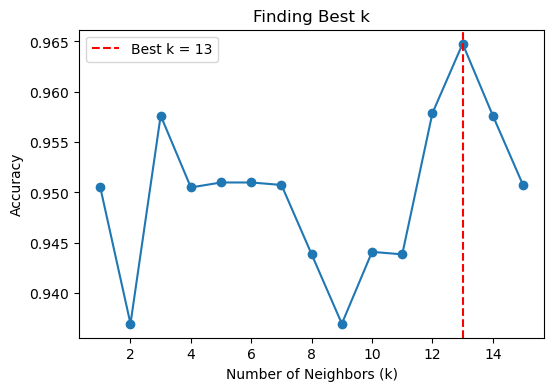

Saved k vs accuracy plot as 'k_vs_accuracy.png'


In [25]:
# Plot k vs accuracy
plt.figure(figsize=(6, 4))
plt.plot(k_range, k_scores, marker='o')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Best k = {optimal_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Finding Best k')
plt.legend()
plt.savefig('k_vs_accuracy.png')
plt.show()
print("Saved k vs accuracy plot as 'k_vs_accuracy.png'")

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(x_train_scl, y_train)
print(f"Trained model with k={optimal_k}")

Trained model with k=13


In [27]:
y_pred = knn_model.predict(x_test_scl)

In [28]:
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0])

In [29]:
pd.DataFrame({"y_true": y_test, "y_pred": y_pred})

,y_true,y_pred
19,0,0
45,0,0
140,2,2
30,0,0
67,1,1
16,0,0
119,1,1
174,2,2
109,1,1
141,2,2


In [30]:
accuracy_score(y_test,y_pred)

0.9722222222222222

In [31]:
joblib.dump(knn_model, "KNNC.pkl")
joblib.dump(scaler, "scl.pkl")

['scl.pkl']